In [30]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_tmp = X_test.copy()
y_test_tmp = y_test.copy()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train/255.0
X_test = X_test/255.0

# one hot encoder
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_pixels = X_test.shape[1]
num_classes = y_test.shape[1]

print num_pixels, num_classes

784 10


In [6]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, 
                    input_dim = num_pixels,
                    init = 'normal',
                    activation = 'relu'))
    
    model.add(Dense(num_classes, 
                    init='normal', 
                    activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          nb_epoch=10, 
          batch_size=200, 
          verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.2791 - acc: 0.9203 - val_loss: 0.1420 - val_acc: 0.9579
Epoch 2/10
9s - loss: 0.1122 - acc: 0.9679 - val_loss: 0.0992 - val_acc: 0.9698
Epoch 3/10
8s - loss: 0.0723 - acc: 0.9789 - val_loss: 0.0782 - val_acc: 0.9751
Epoch 4/10
9s - loss: 0.0509 - acc: 0.9854 - val_loss: 0.0790 - val_acc: 0.9764
Epoch 5/10
9s - loss: 0.0365 - acc: 0.9898 - val_loss: 0.0630 - val_acc: 0.9788
Epoch 6/10
9s - loss: 0.0264 - acc: 0.9930 - val_loss: 0.0648 - val_acc: 0.9797
Epoch 7/10
8s - loss: 0.0186 - acc: 0.9958 - val_loss: 0.0615 - val_acc: 0.9806
Epoch 8/10
8s - loss: 0.0147 - acc: 0.9969 - val_loss: 0.0623 - val_acc: 0.9810
Epoch 9/10
10s - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0607 - val_acc: 0.9816
Epoch 10/10
9s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0598 - val_acc: 0.9821


In [7]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print scores

print("Baseline Score: %.2f%%" % (scores[1]*100))

[0.059831361798860595, 0.98209999999999997]
Baseline Score: 98.21%


In [39]:
#CNN

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_cnn_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, 
                            border_mode='valid', 
                            input_shape=(1, 28, 28), 
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [46]:
# build the model
model = baseline_cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Score: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
40s - loss: 0.2381 - acc: 0.9309 - val_loss: 0.0805 - val_acc: 0.9764
Epoch 2/10
42s - loss: 0.0739 - acc: 0.9775 - val_loss: 0.0506 - val_acc: 0.9846
Epoch 3/10
45s - loss: 0.0505 - acc: 0.9848 - val_loss: 0.0460 - val_acc: 0.9854
Epoch 4/10
40s - loss: 0.0405 - acc: 0.9876 - val_loss: 0.0377 - val_acc: 0.9876
Epoch 5/10
39s - loss: 0.0325 - acc: 0.9899 - val_loss: 0.0364 - val_acc: 0.9880
Epoch 6/10
38s - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0399 - val_acc: 0.9867
Epoch 7/10
40s - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0332 - val_acc: 0.9890
Epoch 8/10
41s - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0330 - val_acc: 0.9883
Epoch 9/10
44s - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0365 - val_acc: 0.9893
Epoch 10/10
42s - loss: 0.0140 - acc: 0.9954 - val_loss: 0.0494 - val_acc: 0.9844
Baseline Error: 1.56%


In [40]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, 
                            border_mode='valid', 
                            input_shape=(1, 28, 28), 
                            activation='tanh'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh'))
    model.add(Dense(50, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          nb_epoch=10, 
          batch_size=200, 
          verbose=2)
# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Larger Model Score: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
119s - loss: 0.3311 - acc: 0.9087 - val_loss: 0.0918 - val_acc: 0.9712
Epoch 2/10
121s - loss: 0.0964 - acc: 0.9719 - val_loss: 0.0583 - val_acc: 0.9806
Epoch 3/10
116s - loss: 0.0689 - acc: 0.9798 - val_loss: 0.0456 - val_acc: 0.9856
Epoch 4/10
117s - loss: 0.0538 - acc: 0.9840 - val_loss: 0.0404 - val_acc: 0.9867
Epoch 5/10
119s - loss: 0.0465 - acc: 0.9861 - val_loss: 0.0324 - val_acc: 0.9892
Epoch 6/10
122s - loss: 0.0415 - acc: 0.9876 - val_loss: 0.0305 - val_acc: 0.9904
Epoch 7/10
124s - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0297 - val_acc: 0.9911
Epoch 8/10
124s - loss: 0.0311 - acc: 0.9906 - val_loss: 0.0273 - val_acc: 0.9915
Epoch 9/10
130s - loss: 0.0268 - acc: 0.9916 - val_loss: 0.0311 - val_acc: 0.9902
Epoch 10/10
126s - loss: 0.0245 - acc: 0.9924 - val_loss: 0.0302 - val_acc: 0.9901
Larger Model Score: 99.01%


99.01


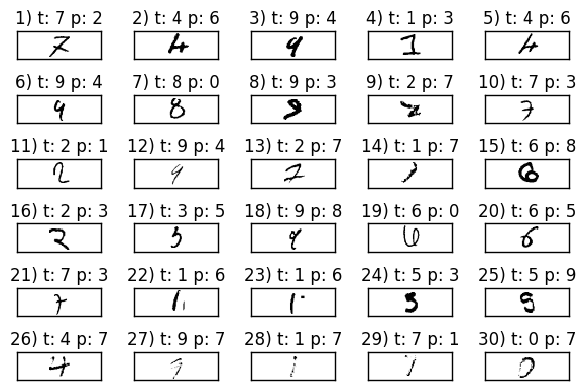

In [50]:
from matplotlib import pyplot as plt
y_test_pred = model.predict_classes(X_test, verbose=0)

score = numpy.sum(y_test_tmp == y_test_pred, axis=0)*1.0/y_test.shape[0]
print ("%.2f" %(score*100))

miscl_img = X_test_tmp[y_test_tmp != y_test_pred][50:80]
correct_lab = y_test_tmp[y_test_tmp != y_test_pred][50:80]
miscl_lab = y_test_pred[y_test_tmp != y_test_pred][50:80]

fig, ax = plt.subplots(nrows = 6, ncols = 5, sharex=True, sharey=True)

ax = ax.flatten()

for i in range(30):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t: %d p: %d' %(i+1, correct_lab[i], miscl_lab[i]))
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()